#  Bank Customer Churn Prediction

### Importing the libraries

In [306]:
import numpy as np
import pandas as pd
import tensorflow as tf
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Part 1 - Data Preprocessing

### Importing the dataset

In [307]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [308]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [309]:
dataset["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [310]:
x=dataset.iloc[:,3:-1].values
y=dataset.iloc[:,-1].values

# Exploratory Data Analysis

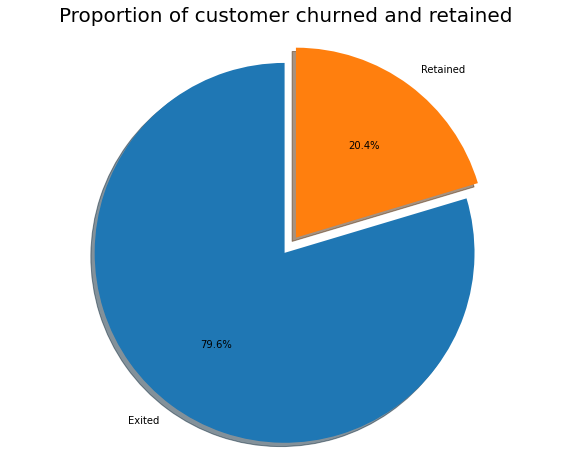

In [311]:
labels = 'Exited', 'Retained'
sizes = [dataset.Exited[dataset['Exited']==0].count(), dataset.Exited[dataset['Exited']==1].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

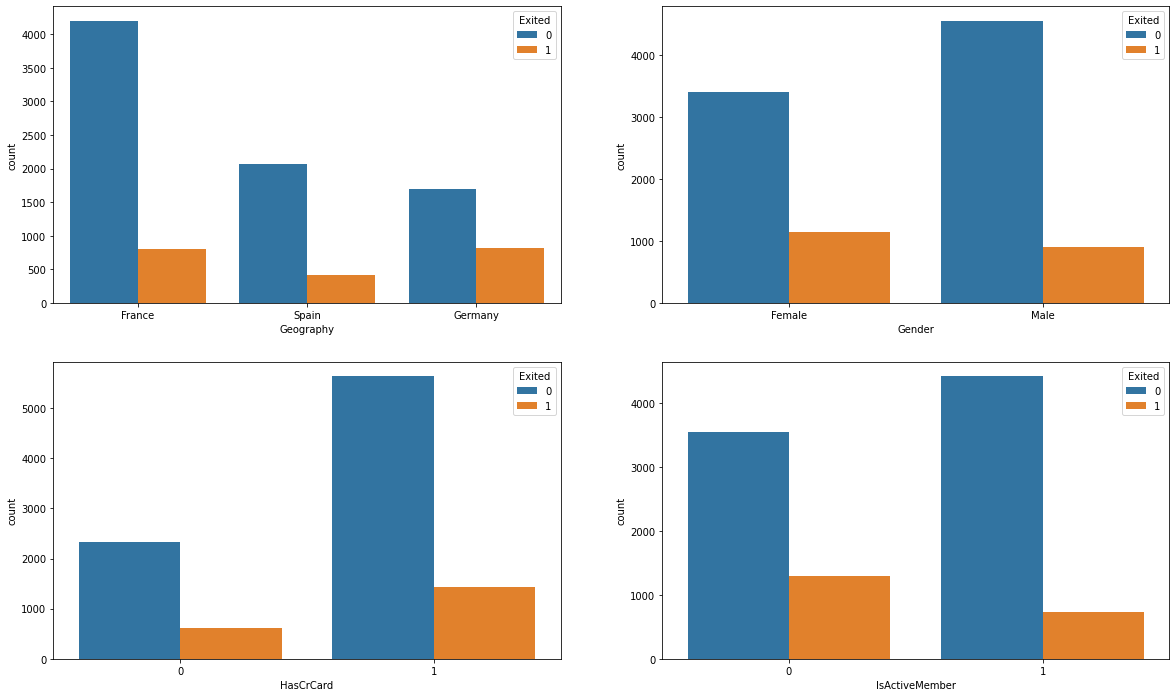

In [312]:
    # We first review the 'Status' relation with categorical variables
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='Geography', hue = 'Exited',data = dataset, ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Exited',data = dataset, ax=axarr[0][1])
    sns.countplot(x='HasCrCard', hue = 'Exited',data = dataset, ax=axarr[1][0])
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = dataset, ax=axarr[1][1])

We note the following:

Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.
The proportion of female customers churning is also greater than that of male customers
Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.
Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

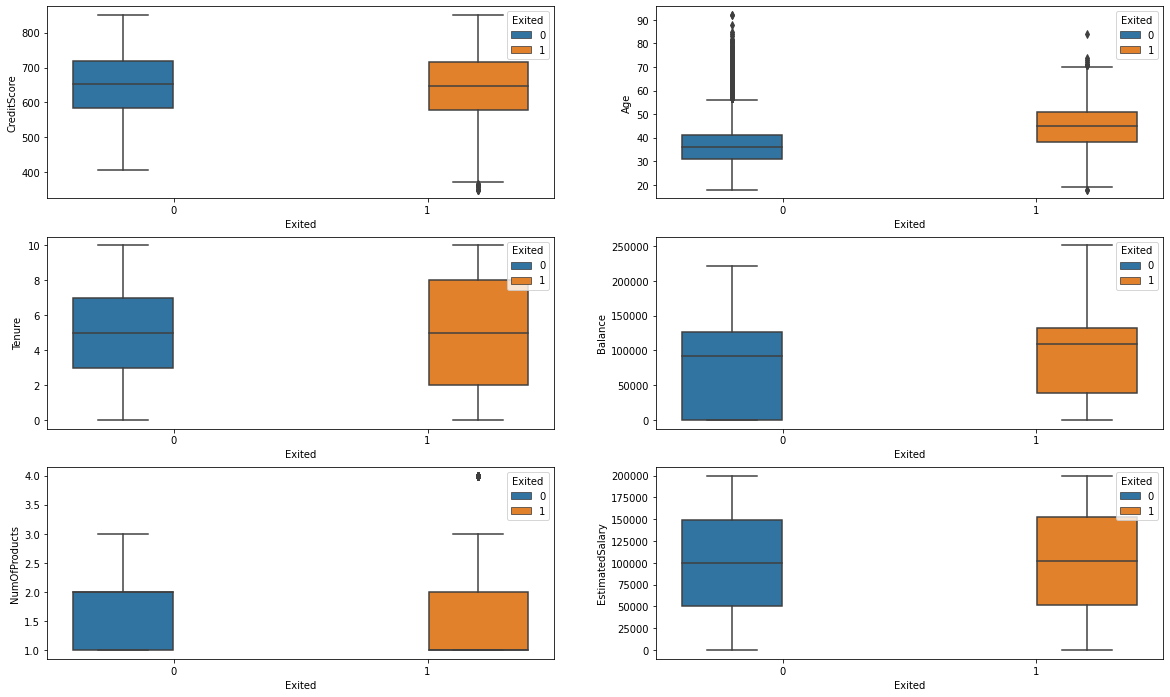

In [313]:
  # Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = dataset , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[2][1])

We note the following:

There is no significant difference in the credit score distribution between retained and churned customers.
The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups
With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
Neither the product nor the salary has a significant effect on the likelihood to churn.

### Encoding categorical data

Label Encoding the "Gender" column

In [314]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,2]=le.fit_transform(x[:,2])

One Hot Encoding the "Geography" column

In [315]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [316]:
print(x)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [317]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(x,y)
data = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
data.columns=["Exited","Geography[0]","Geography[1]","Geography[2]","CreditScore","Gender","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"]

In [318]:
data

,Exited,Geography[0],Geography[1],Geography[2],CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,1.000000,0.000000,0.0,619.000000,0.000000,42.000000,2.000000,0.000000,1.000000,1.000000,1.000000,101348.880000
1,0,0.000000,0.000000,1.0,608.000000,0.000000,41.000000,1.000000,83807.860000,1.000000,0.000000,1.000000,112542.580000
2,1,1.000000,0.000000,0.0,502.000000,0.000000,42.000000,8.000000,159660.800000,3.000000,1.000000,0.000000,113931.570000
3,0,1.000000,0.000000,0.0,699.000000,0.000000,39.000000,1.000000,0.000000,2.000000,0.000000,0.000000,93826.630000
4,0,0.000000,0.000000,1.0,850.000000,0.000000,43.000000,2.000000,125510.820000,1.000000,1.000000,1.000000,79084.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15921,1,0.737346,0.262654,0.0,662.696311,1.000000,49.212039,5.313268,150334.344730,2.474693,1.000000,0.737346,124075.996213
15922,1,0.000000,0.000000,1.0,594.007651,0.000000,40.319051,2.334353,0.000000,1.000000,0.667177,1.000000,130144.261430
15923,1,0.227177,0.772823,0.0,677.732419,0.772823,44.135887,1.772823,167502.069193,1.000000,0.227177,0.000000,117569.480952
15924,1,0.947615,0.052385,0.0,723.342439,0.052385,61.161843,4.104770,140577.109999,1.000000,0.947615,0.000000,31178.255036


In [319]:
data["Exited"].value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [320]:
X=data.iloc[:,1:]

In [321]:
Y =data.iloc[:,0]

### Splitting the dataset into the Training set and Test set

In [322]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [323]:
X_train

,Geography[0],Geography[1],Geography[2],CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9960,0.0,1.000000,0.000000,795.000000,0.000000,33.000000,9.000000,104552.720000,1.000000,1.000000,1.000000,120853.830000
6145,0.0,0.000000,1.000000,530.000000,0.000000,22.000000,7.000000,0.000000,2.000000,1.000000,0.000000,104170.480000
13882,0.0,0.000000,1.000000,652.045814,1.000000,42.524000,1.233818,0.000000,1.822545,1.000000,0.411273,65608.109119
12253,0.0,0.249937,0.750063,615.991189,0.249937,24.999748,9.750063,158021.965066,1.249937,0.750063,1.000000,102213.684085
5590,0.0,1.000000,0.000000,775.000000,1.000000,25.000000,10.000000,60205.200000,2.000000,1.000000,0.000000,14073.110000
...,...,...,...,...,...,...,...,...,...,...,...,...
13123,1.0,0.000000,0.000000,573.537198,0.138583,31.415750,7.277167,0.000000,1.000000,0.138583,0.861417,183047.367661
3264,1.0,0.000000,0.000000,738.000000,1.000000,35.000000,5.000000,161274.050000,2.000000,1.000000,0.000000,181429.870000
9845,0.0,0.000000,1.000000,590.000000,0.000000,38.000000,9.000000,0.000000,2.000000,1.000000,1.000000,148750.160000
10799,0.0,1.000000,0.000000,677.691125,0.000000,32.983518,7.641680,112694.049449,1.000000,1.000000,0.320840,162584.591546


In [324]:
X_test

,Geography[0],Geography[1],Geography[2],CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
10878,0.000000,0.721015,0.278985,562.061510,1.000000,44.931169,3.884061,135565.027375,1.000000,1.000000,0.721015,58921.899223
13564,0.000000,1.000000,0.000000,579.931062,0.000000,29.200958,4.666489,101730.767567,1.533404,1.000000,0.000000,70230.392266
3959,0.000000,1.000000,0.000000,663.000000,1.000000,49.000000,7.000000,116150.650000,3.000000,1.000000,1.000000,84358.710000
12402,1.000000,0.000000,0.000000,694.971581,1.000000,47.852272,4.036932,101266.978219,1.963068,0.000000,1.000000,177831.362948
14151,0.000000,0.450792,0.549208,679.386996,0.549208,44.196831,4.352377,64921.538363,1.901585,0.000000,1.000000,186584.338244
...,...,...,...,...,...,...,...,...,...,...,...,...
14403,0.459079,0.000000,0.540921,695.292812,1.000000,40.754475,3.672633,0.000000,1.000000,0.540921,0.000000,65764.024009
98,0.000000,0.000000,1.000000,710.000000,1.000000,22.000000,8.000000,0.000000,2.000000,0.000000,0.000000,99645.040000
12698,0.713627,0.286373,0.000000,538.949314,0.713627,55.713627,7.286373,151782.635723,2.286373,0.713627,0.000000,134413.635271
9459,1.000000,0.000000,0.000000,650.000000,0.000000,47.000000,9.000000,0.000000,1.000000,1.000000,0.000000,187943.600000


### Feature Scaling

In [325]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [326]:
X_train

array([[-0.98655343,  1.58107161, -0.57318408, ...,  0.6963038 ,
         1.14805879,  0.35714141],
       [-0.98655343, -0.69574725,  1.9434052 , ...,  0.6963038 ,
        -0.98914897,  0.06794102],
       [-0.98655343, -0.69574725,  1.9434052 , ...,  0.6963038 ,
        -0.11017377, -0.600525  ],
       ...,
       [-0.98655343, -0.69574725,  1.9434052 , ...,  0.6963038 ,
         1.14805879,  0.84071512],
       [-0.98655343,  1.58107161, -0.57318408, ...,  0.6963038 ,
        -0.30344735,  1.08053044],
       [-0.98655343,  1.58107161, -0.57318408, ...,  0.6963038 ,
        -0.98914897,  0.32249685]])

In [327]:
X_test

array([[-0.98655343,  0.94587411,  0.12890568, ...,  0.6963038 ,
         0.55181065, -0.71642825],
       [-0.98655343,  1.58107161, -0.57318408, ...,  0.6963038 ,
        -0.98914897, -0.52039924],
       [-0.98655343,  1.58107161, -0.57318408, ...,  0.6963038 ,
         1.14805879, -0.2754895 ],
       ...,
       [ 0.52211029, -0.04372884, -0.57318408, ...,  0.02461917,
        -0.98914897,  0.59219617],
       [ 1.12752402, -0.69574725, -0.57318408, ...,  0.6963038 ,
        -0.98914897,  1.52012051],
       [-0.98655343, -0.69574725,  1.9434052 , ...,  0.6963038 ,
        -0.98914897, -0.57227121]])

## Part 2 - Building the ANN

### Initializing the ANN

In [328]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [329]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [330]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [331]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [332]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [333]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [334]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [335]:
ann.fit(X_train, Y_train, batch_size = 32, epochs = 100)

Epoch 1/100
349/349 [==============================] - 2s 2ms/step - loss: 0.6482 - accuracy: 0.6235
Epoch 2/100
349/349 [==============================] - 1s 1ms/step - loss: 0.5545 - accuracy: 0.7308
Epoch 3/100
349/349 [==============================] - 0s 1ms/step - loss: 0.5315 - accuracy: 0.7458
Epoch 4/100
349/349 [==============================] - 1s 2ms/step - loss: 0.5107 - accuracy: 0.7608
Epoch 5/100
349/349 [==============================] - 0s 1ms/step - loss: 0.4894 - accuracy: 0.7732
Epoch 6/100
349/349 [==============================] - 0s 1ms/step - loss: 0.4732 - accuracy: 0.7828
Epoch 7/100
349/349 [==============================] - 1s 2ms/step - loss: 0.4604 - accuracy: 0.7883
Epoch 8/100
349/349 [==============================] - 0s 1ms/step - loss: 0.4501 - accuracy: 0.7919
Epoch 9/100
349/349 [==============================] - 0s 1ms/step - loss: 0.4388 - accuracy: 0.7976
Epoch 10/100
349/349 [==============================] - 1s 1ms/step - loss: 0.4271 - accura

349/349 [==============================] - 1s 2ms/step - loss: 0.3014 - accuracy: 0.8685
Epoch 82/100
349/349 [==============================] - 0s 1ms/step - loss: 0.3011 - accuracy: 0.8690
Epoch 83/100
349/349 [==============================] - 0s 1ms/step - loss: 0.3003 - accuracy: 0.8672
Epoch 84/100
349/349 [==============================] - 1s 2ms/step - loss: 0.3013 - accuracy: 0.8704
Epoch 85/100
349/349 [==============================] - 0s 1ms/step - loss: 0.3022 - accuracy: 0.8663
Epoch 86/100
349/349 [==============================] - 0s 1ms/step - loss: 0.3016 - accuracy: 0.8670
Epoch 87/100
349/349 [==============================] - 1s 2ms/step - loss: 0.3015 - accuracy: 0.8639
Epoch 88/100
349/349 [==============================] - 0s 1ms/step - loss: 0.2999 - accuracy: 0.8680
Epoch 89/100
349/349 [==============================] - 0s 1ms/step - loss: 0.3036 - accuracy: 0.8679
Epoch 90/100
349/349 [==============================] - 1s 2ms/step - loss: 0.3021 - accuracy: 

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

In [336]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 82ms/step
[[False]]


C:\Users\diwakarakc\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Predicting the Test set results

In [337]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

150/150 [==============================] - 0s 1ms/step


### Making the Confusion Matrix

In [338]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2152  232]
 [ 414 1980]]


0.864796986186689

# **Saving the Model**

In [339]:
ann.save('ANN_model')

INFO:tensorflow:Assets written to: ANN_model\assets


In [340]:
from tensorflow import keras
model = keras.models.load_model('ANN_model')

In [341]:
print(model.predict(sc.transform([[0, 0, 1, 608,  0, 41, 1, 83807.86, 1, 0, 1, 112542.580000]])) )

1/1 [==============================] - 0s 105ms/step
[[0.17310604]]


C:\Users\diwakarakc\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [343]:
import pickle
pickle.dump(sc, open('standardscaler.pkl','wb'))



In [344]:
profile = pp.ProfileReport(dataset)
profile1 = pp.ProfileReport(data)
profile.to_file("Result_Before.html")
profile1.to_file("Result_After.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]